In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


In [2]:
df=pd.read_csv("cybercrime_profiles.csv")
df

,Technical Know How,Personal Traits,Social Characterstics,Motivating Factors
0,Well-organized,Incited,Anti-establishment,Monetary Gain
1,Bully,Identity crisis,Inferiority complex,Lust
2,Well-organized,PassionateInsensitive,Mass-destructionMisguided,Religious fundamentalism
3,ResourcefulGoal oriented,Control freakPsychologically Deviant,Unlawful,Enhancing selfworth
4,Oppurtinists,Gullible,Unlawful,Revenge
...,...,...,...,...
995,Well-networked,Emotional,Low self-worth,No fear of punishment
996,Well-organized,Emotional,Need to outsmart others,Anger
997,Bully,Vengeful,Mass-destructionMisguided,Monetary Gain
998,Well trained,Selfish,Anti-social,Curiosity


In [3]:
df.describe()

,Technical Know How,Personal Traits,Social Characterstics,Motivating Factors
count,1000,1000,1000,1000
unique,12,23,16,21
top,Sharp,Gullible,Low self-worth,Experimentation
freq,97,54,78,61


In [4]:
labelEncoder = LabelEncoder()

labelEncoder.fit(df["Technical Know How"])
df["Technical Know How"]=labelEncoder.transform(df["Technical Know How"])

labelEncoder.fit(df["Personal Traits"])
df["Personal Traits"]=labelEncoder.transform(df["Personal Traits"])

labelEncoder.fit(df["Social Characterstics"])
df["Social Characterstics"]=labelEncoder.transform(df["Social Characterstics"])

labelEncoder.fit(df["Motivating Factors"])
df["Motivating Factors"]=labelEncoder.transform(df["Motivating Factors"])


In [5]:
df.head()

,Technical Know How,Personal Traits,Social Characterstics,Motivating Factors
0,10,11,0,11
1,0,9,4,9
2,10,15,9,17
3,3,3,15,5
4,2,8,15,18


In [6]:
scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(df)

In [7]:
df_scaled=pd.DataFrame(scaled_array, columns=["Technical Know How","Personal Traits",
                                              "Social Characterstics","Motivating Factors"])
df_scaled.head()

,Technical Know How,Personal Traits,Social Characterstics,Motivating Factors
0,0.909091,0.500000,0.000000,0.55
1,0.000000,0.409091,0.266667,0.45
2,0.909091,0.681818,0.600000,0.85
3,0.272727,0.136364,1.000000,0.25
4,0.181818,0.363636,1.000000,0.90


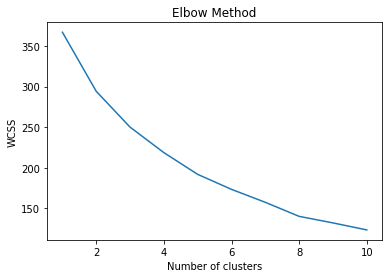

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred = kmeans.fit_predict(df_scaled)


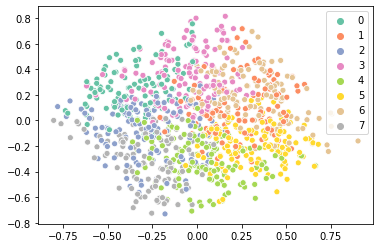

In [11]:
from sklearn.decomposition import PCA
import seaborn as sns
import plotly.express as px
def prepare_pca( n_components, data, labels):
    names = list(map(chr, range(97, 97 + n_components)))
    matrix = PCA(n_components=n_components).fit_transform(data)
    df_matrix = pd.DataFrame(matrix)
    df_matrix.rename({i: names[i] for i in range(n_components)}, axis=1, inplace=True)
    df_matrix['labels'] = labels

    sns.scatterplot(x=df_matrix.a.values, y=df_matrix.b.values, 
                      hue=df_matrix.labels.values, palette='Set2')
    
prepare_pca(2,df_scaled,pred)